In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx

#### NC shapefile

In [3]:
gdf = geopandas.read_file('datasets/la_city_ncs/geo_export_57c7b94a-0e4f-4e76-9a06-39e7e80bed6c.shp')
print(gdf.shape)
gdf.head(3)

(99, 9)


,date_certi,time_certi,dwebsite,name,nc_id,objectid,service_re,waddress,geometry
0,2002-04-27,00:00:00.000,http://empowerla.org/LHNC,LINCOLN HEIGHTS NC,47.0,1.0,REGION 8 - NORTH EAST LA,http://www.lincolnheightsnc.org/,"POLYGON ((-118.20503 34.05558, -118.20605 34.0..."
1,2008-06-16,00:00:00.000,https://empowerla.org/voicesof90037/,VOICES OF 90037,109.0,2.0,REGION 9 - SOUTH LA 2,https://www.voicesnc.org,"POLYGON ((-118.28273 34.01114, -118.28234 34.0..."
2,2002-06-11,00:00:00.000,http://empowerla.org/LFNC,LOS FELIZ NC,36.0,3.0,REGION 7 - EAST,http://www.losfeliznc.org/,"POLYGON ((-118.30027 34.15793, -118.29883 34.1..."


#### Census data

In [4]:
census = pd.read_csv('datasets/la_census_2010.csv')
print(census.shape)
census.rename(columns={'NC_Name':'name'},inplace=True)
census.head()

(97, 13)


,name,Total Population,White_pop,Black_pop,Ameri_es_pop,Asian_pop,Hawn_pi_pop,Hispanic_pop,Other_pop,Multi_pop,In_Poverty,Owner_occ,Renter_occ
0,ARLETA NC,34932.84,2882.67,409.67,67.64,4061.31,34.96,NaN,37.58,245.05,34700.56,5590.27,2159.94
1,ARROYO SECO NC,21711.47,4640.35,782.76,89.51,3215.37,25.38,NaN,66.98,263.12,21582.85,4138.14,3235.61
2,ATWATER VILLAGE NC,11385.40,3450.70,127.80,0.15,2379.08,71.85,NaN,0.37,252.76,11345.53,1877.30,2902.89
3,BEL AIR-BEVERLY CREST NC,26789.14,22024.61,349.63,0.02,1787.79,0.01,NaN,156.92,946.28,26623.97,8939.21,1943.18
4,BOYLE HEIGHTS NC,81900.56,1562.20,640.97,63.63,2266.59,73.99,NaN,90.30,98.50,81144.31,4743.28,16001.77


#### Merge into single gdf

In [5]:
new = gdf.merge(census,on='name',how='outer')
print(new.shape)
new.tail()

(99, 21)


,date_certi,time_certi,dwebsite,name,nc_id,objectid,service_re,waddress,geometry,Total Population,...,Black_pop,Ameri_es_pop,Asian_pop,Hawn_pi_pop,Hispanic_pop,Other_pop,Multi_pop,In_Poverty,Owner_occ,Renter_occ
94,2002-08-13,00:00:00.000,http://empowerla.org/SORONC,SOUTH ROBERTSON NC,61.0,91.0,REGION 11 - WEST LA,http://www.soronc.org/,"POLYGON ((-118.38235 34.06294, -118.38142 34.0...",43700.98,...,3155.79,131.37,4011.16,36.99,NaN,244.48,1648.33,43383.91,5945.88,12114.59
95,2002-04-16,00:00:00.000,http://empowerla.org/GEPENC,ECHO PARK NC,44.0,100.0,REGION 7 - EAST,http://gepenc.org/,"POLYGON ((-118.25030 34.10150, -118.24998 34.1...",43876.59,...,1280.53,154.25,7985.13,27.72,NaN,113.87,521.20,43562.57,3114.42,12578.71
96,2002-10-15,00:00:00.000,http://empowerla.org/HUNC,HOLLYWOOD UNITED NC,30.0,101.0,REGION 5 - CENTRAL 1,http://www.hollywoodunitednc.org/,"POLYGON ((-118.30666 34.11669, -118.30665 34.1...",20349.43,...,993.83,192.89,1345.10,0.00,NaN,54.27,621.15,20102.63,3007.29,8112.64
97,2017-05-25,00:00:00.000,http://empowerla.org/hnc/,HERMON NC,126.0,102.0,REGION 8 - NORTH EAST LA,https:/www./hermonnc.org/,"POLYGON ((-118.17592 34.11236, -118.17607 34.1...",4395.45,...,229.08,0.20,915.43,0.00,NaN,0.43,92.00,4377.46,837.87,837.24
98,2010-01-19,00:00:00.000,https://empowerla.org/nwwnc/,NORTH WESTWOOD NC,127.0,105.0,REGION 11 - WEST LA,https://empowerla.org/nwwnc/,"POLYGON ((-118.44576 34.05534, -118.44578 34.0...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


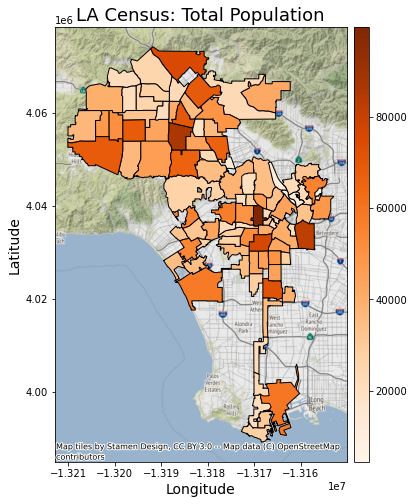

In [6]:
new = new.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(10,8))
plt.title('LA Census: Total Population',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
new.plot(column='Total Population',ax=ax, legend=True, cax=cax, cmap='Oranges',edgecolor='black')
ctx.add_basemap(ax);

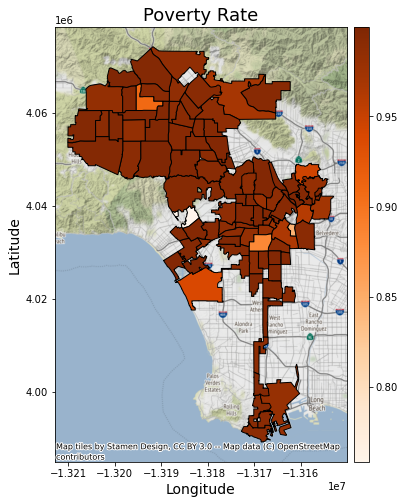

In [10]:
new['poverty_rate'] = new['In_Poverty']/new['Total Population']

new = new.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(10,8))
plt.title('Poverty Rate',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
new.plot(column='poverty_rate',ax=ax, legend=True, cax=cax, cmap='Oranges',edgecolor='black')
ctx.add_basemap(ax);

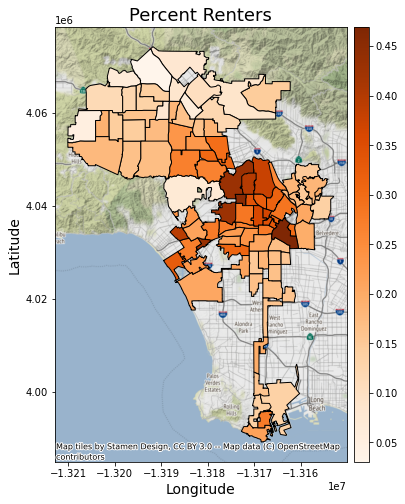

In [9]:
new['renter_rate'] = new['Renter_occ']/new['Total Population']

new = new.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(10,8))
plt.title('Percent Renters',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
new.plot(column='renter_rate',ax=ax, legend=True, cax=cax, cmap='Oranges',edgecolor='black')
ctx.add_basemap(ax);

In [57]:
new.columns

Index(['date_certi', 'time_certi', 'dwebsite', 'name', 'nc_id', 'objectid',
       'service_re', 'waddress', 'geometry', 'Total Population', 'White_pop',
       'Black_pop', 'Ameri_es_pop', 'Asian_pop', 'Hawn_pi_pop', 'Hispanic_pop',
       'Other_pop', 'Multi_pop', 'In_Poverty', 'Owner_occ', 'Renter_occ'],
      dtype='object')

In [90]:
new['Poverty Rate'] = new['In_Poverty']/new['Total Population']
new['Owner Rate'] = new['Owner_occ']/new['Total Population']
new['Renter Rate'] = new['Renter_occ']/new['Total Population']
new['Black_pct'] = new['Black_pop']/new['Total Population']
new['White_pct'] = new['White_pop']/new['Total Population']

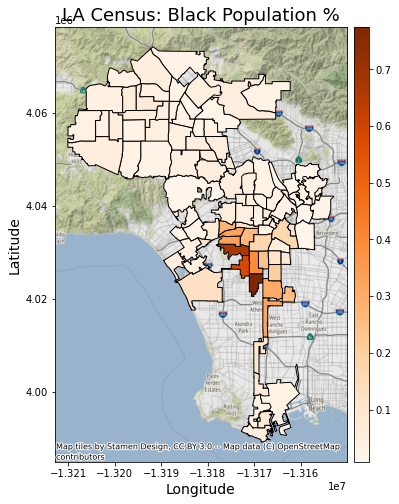

In [88]:
new = new.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(10,8))
plt.title('LA Census: Black Population %',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
new.plot(column='Black_pct',ax=ax, legend=True, cax=cax, cmap='Oranges',edgecolor='black')
ctx.add_basemap(ax);

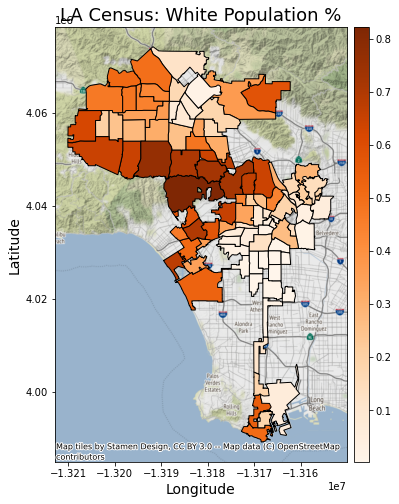

In [91]:
new = new.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(10,8))
plt.title('LA Census: White Population %',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
new.plot(column='White_pct',ax=ax, legend=True, cax=cax, cmap='Oranges',edgecolor='black')
ctx.add_basemap(ax);

In [116]:
crime = pd.read_csv('crime.csv')
print(crime.shape)
crime.head().T

(2210104, 302)


,0,1,2,3,4
nu_index,0,1,2,3,4
DR_NO,1307355,11401303,70309629,90631215,100100501
Date Rptd,02/20/2010 12:00:00 AM,09/13/2010 12:00:00 AM,08/09/2010 12:00:00 AM,01/05/2010 12:00:00 AM,01/03/2010 12:00:00 AM
DATE OCC,02/20/2010 12:00:00 AM,09/12/2010 12:00:00 AM,08/09/2010 12:00:00 AM,01/05/2010 12:00:00 AM,01/02/2010 12:00:00 AM
TIME OCC,1350,45,1515,150,2100
...,...,...,...,...,...
Willowbrook,0,0,0,0,0
Wilmington,0,0,0,0,0
Windsor Square,0,0,0,0,0
Winnetka,0,0,0,0,0


In [119]:
crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'])

In [120]:
crime['2010'] = [1 if date.year == 2010 else 0 for date in crime['DATE OCC']]
crime['2011'] = [1 if date.year == 2011 else 0 for date in crime['DATE OCC']]
crime['2012'] = [1 if date.year == 2012 else 0 for date in crime['DATE OCC']]
crime['2013'] = [1 if date.year == 2013 else 0 for date in crime['DATE OCC']]
crime['2014'] = [1 if date.year == 2014 else 0 for date in crime['DATE OCC']]
crime['2015'] = [1 if date.year == 2015 else 0 for date in crime['DATE OCC']]
crime['2016'] = [1 if date.year == 2016 else 0 for date in crime['DATE OCC']]
crime['2017'] = [1 if date.year == 2017 else 0 for date in crime['DATE OCC']]
crime['2018'] = [1 if date.year == 2018 else 0 for date in crime['DATE OCC']]
crime['2019'] = [1 if date.year == 2019 else 0 for date in crime['DATE OCC']]
crime['2020'] = [1 if date.year == 2020 else 0 for date in crime['DATE OCC']]

In [134]:
gdf = geopandas.read_file('../covid_la/datasets/gis_data/la-county-neighborhoods-current/l.a. county neighborhood (current).shp')
gdf.rename(columns={'name':'place'},inplace=True)
print(gdf.shape)
gdf.head(3)

(272, 11)


,slug,set,kind,external_i,place,display_na,sqmi,type,name_1,slug_1,geometry
0,acton,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),acton,Acton,Acton L.A. County Neighborhood (Current),39.3391089485,unincorporated-area,None,None,"POLYGON ((-118.20262 34.53899, -118.18947 34.5..."
1,adams-normandie,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),adams-normandie,Adams-Normandie,Adams-Normandie L.A. County Neighborhood (Curr...,0.805350187789,segment-of-a-city,None,None,"POLYGON ((-118.30901 34.03741, -118.30041 34.0..."
2,agoura-hills,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),agoura-hills,Agoura Hills,Agoura Hills L.A. County Neighborhood (Current),8.14676029818,standalone-city,None,None,"POLYGON ((-118.76193 34.16820, -118.72632 34.1..."


#### Feature Engineering

In [137]:
series11 = []
series12 = []
series13 = []
series14 = []
series15 = []
series16 = []
series17 = []
series18 = []
series19 = []

for place in gdf['place']:
    series11.append(crime[crime['2011']==1][place].sum()-crime[crime['2010']==1][place].sum())
    series12.append(crime[crime['2012']==1][place].sum()-crime[crime['2011']==1][place].sum())
    series13.append(crime[crime['2013']==1][place].sum()-crime[crime['2012']==1][place].sum())
    series14.append(crime[crime['2014']==1][place].sum()-crime[crime['2013']==1][place].sum())
    series15.append(crime[crime['2015']==1][place].sum()-crime[crime['2014']==1][place].sum())
    series16.append(crime[crime['2016']==1][place].sum()-crime[crime['2015']==1][place].sum())
    series17.append(crime[crime['2017']==1][place].sum()-crime[crime['2016']==1][place].sum())
    series18.append(crime[crime['2018']==1][place].sum()-crime[crime['2017']==1][place].sum())
    series19.append(crime[crime['2019']==1][place].sum()-crime[crime['2018']==1][place].sum())

gdf['change_11'] = series11
gdf['change_12'] = series12
gdf['change_13'] = series13
gdf['change_14'] = series14
gdf['change_15'] = series15
gdf['change_16'] = series16
gdf['change_17'] = series17
gdf['change_18'] = series18
gdf['change_19'] = series19

In [143]:
series = []

for place in gdf['place']:
    series.append(crime[place].sum())

gdf['AllCrimes_2010-2020'] = series

In [152]:
series2011 = []
series2012 = []
series2013 = []
series2014 = []
series2015 = []
series2016 = []
series2017 = []
series2018 = []
series2019 = []
series2020 = []

for place in gdf['place']:
    series2011.append(crime[crime['2011']==1][place].sum())
    series2012.append(crime[crime['2012']==1][place].sum())
    series2013.append(crime[crime['2013']==1][place].sum())
    series2014.append(crime[crime['2014']==1][place].sum())
    series2015.append(crime[crime['2015']==1][place].sum())
    series2016.append(crime[crime['2016']==1][place].sum())
    series2017.append(crime[crime['2017']==1][place].sum())
    series2018.append(crime[crime['2018']==1][place].sum())
    series2019.append(crime[crime['2019']==1][place].sum())
    series2020.append(crime[crime['2020']==1][place].sum())

gdf['crime_11'] = series2011
gdf['crime_12'] = series2012
gdf['crime_13'] = series2013
gdf['crime_14'] = series2014
gdf['crime_15'] = series2015
gdf['crime_16'] = series2016
gdf['crime_17'] = series2017
gdf['crime_18'] = series2018
gdf['crime_19'] = series2019
gdf['crime_20'] = series2020

In [153]:
series2010 = []
for place in gdf['place']:
    series2010.append(crime[crime['2010']==1][place].sum())
gdf['crime_10'] = series2010

In [154]:
gdf['change_11_pct'] = gdf['change_11']/gdf['crime_10']
gdf['change_12_pct'] = gdf['change_12']/gdf['crime_11']
gdf['change_13_pct'] = gdf['change_13']/gdf['crime_12']
gdf['change_14_pct'] = gdf['change_14']/gdf['crime_13']
gdf['change_15_pct'] = gdf['change_15']/gdf['crime_14']
gdf['change_16_pct'] = gdf['change_16']/gdf['crime_15']
gdf['change_17_pct'] = gdf['change_17']/gdf['crime_16']
gdf['change_18_pct'] = gdf['change_18']/gdf['crime_17']
gdf['change_19_pct'] = gdf['change_19']/gdf['crime_18']

In [157]:
gdf['last10_pct'] = gdf['change_11_pct']+gdf['change_12_pct']+gdf['change_13_pct']+gdf['change_14_pct']+gdf['change_15_pct']+gdf['change_16_pct']+gdf['change_17_pct']+gdf['change_18_pct']+gdf['change_19_pct']
gdf['last5_pct_pct'] = gdf['change_15_pct']+gdf['change_16_pct']+gdf['change_17_pct']+gdf['change_18_pct']+gdf['change_19_pct']

#### Generate Plots

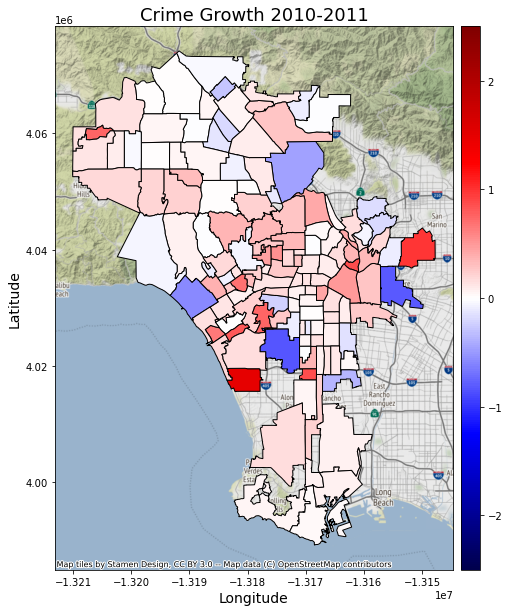

In [162]:
gdf = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(16,10))
plt.title('Crime Growth 2010-2011',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf[gdf['AllCrimes_2010-2020']>100].plot(column='last5_pct_pct',ax=ax, legend=True, cax=cax, cmap='seismic',vmin=-2.5,vmax=2.5,edgecolor='black')
ctx.add_basemap(ax);

In [163]:
gdf.head(3).T

,0,1,2
slug,acton,adams-normandie,agoura-hills
set,L.A. County Neighborhoods (Current),L.A. County Neighborhoods (Current),L.A. County Neighborhoods (Current)
kind,L.A. County Neighborhood (Current),L.A. County Neighborhood (Current),L.A. County Neighborhood (Current)
external_i,acton,adams-normandie,agoura-hills
place,Acton,Adams-Normandie,Agoura Hills
display_na,Acton L.A. County Neighborhood (Current),Adams-Normandie L.A. County Neighborhood (Curr...,Agoura Hills L.A. County Neighborhood (Current)
sqmi,39.3391089485,0.805350187789,8.14676029818
type,unincorporated-area,segment-of-a-city,standalone-city
name_1,None,None,None
slug_1,None,None,None


#### Write gdf to file

In [164]:
gdf.to_file("datasets/crime_maps.shp")

### LA Neighborhoods

In [130]:
justla = gdf = geopandas.read_file('datasets/la_neighborhoods/geo_export_49d48464-aae1-4b34-8819-d90c06a3c422.shp')
print(justla.shape)
justla.head(3)

(99, 9)


,date_certi,time_certi,dwebsite,name,nc_id,objectid,service_re,waddress,geometry
0,2002-04-27,00:00:00.000,http://empowerla.org/LHNC,LINCOLN HEIGHTS NC,47.0,1.0,REGION 8 - NORTH EAST LA,http://www.lincolnheightsnc.org/,"POLYGON ((-118.20503 34.05558, -118.20605 34.0..."
1,2008-06-16,00:00:00.000,https://empowerla.org/voicesof90037/,VOICES OF 90037,109.0,2.0,REGION 9 - SOUTH LA 2,https://www.voicesnc.org,"POLYGON ((-118.28273 34.01114, -118.28234 34.0..."
2,2002-06-11,00:00:00.000,http://empowerla.org/LFNC,LOS FELIZ NC,36.0,3.0,REGION 7 - EAST,http://www.losfeliznc.org/,"POLYGON ((-118.30027 34.15793, -118.29883 34.1..."


In [131]:
series = []

for place in justla['name']:
    series.append(crime[crime['2011']==1][place].sum()-crime[crime['2010']==1][place].sum())

justla['change_11'] = series

KeyError: 'LINCOLN HEIGHTS NC'

In [132]:
gdf.head()

,date_certi,time_certi,dwebsite,name,nc_id,objectid,service_re,waddress,geometry
0,2002-04-27,00:00:00.000,http://empowerla.org/LHNC,LINCOLN HEIGHTS NC,47.0,1.0,REGION 8 - NORTH EAST LA,http://www.lincolnheightsnc.org/,"POLYGON ((-118.20503 34.05558, -118.20605 34.0..."
1,2008-06-16,00:00:00.000,https://empowerla.org/voicesof90037/,VOICES OF 90037,109.0,2.0,REGION 9 - SOUTH LA 2,https://www.voicesnc.org,"POLYGON ((-118.28273 34.01114, -118.28234 34.0..."
2,2002-06-11,00:00:00.000,http://empowerla.org/LFNC,LOS FELIZ NC,36.0,3.0,REGION 7 - EAST,http://www.losfeliznc.org/,"POLYGON ((-118.30027 34.15793, -118.29883 34.1..."
3,2005-04-19,00:00:00.000,http://empowerla.org/MHNC,MISSION HILLS NC,101.0,4.0,REGION 1 - NORTH EAST VALLEY,http://mhnconline.org/,"POLYGON ((-118.46933 34.28050, -118.46931 34.2..."
4,2002-09-10,00:00:00.000,http://empowerla.org/GTLNC,GREATER TOLUCA LAKE NC,28.0,5.0,REGION 4 - SOUTH EAST VALLEY,http://www.gtlnc.org/,"POLYGON ((-118.35520 34.16491, -118.35529 34.1..."
